# Linear Regression for the Iced Days of Lake in WI
Copyright Pengyu Kan 2019.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv

## Write Years into File

In [3]:
def modify_file(filename):
    with open(filename, 'w') as modifyFile:
        for i in range(1852, 2018):
            modifyFile.write(str(i) + "\n")
        modifyFile.close()

## Read from data file

In [5]:
def read_file(filename):
    dic = dict()
    with open(filename) as f:
        for line in f:
            words = line.split()
            dic[int(words[0])] = int(words[1])
    return dic

In [6]:
dic_mendota = read_file("Mendota.txt")
dic_monona = read_file("Monona.txt")

## Question 1:

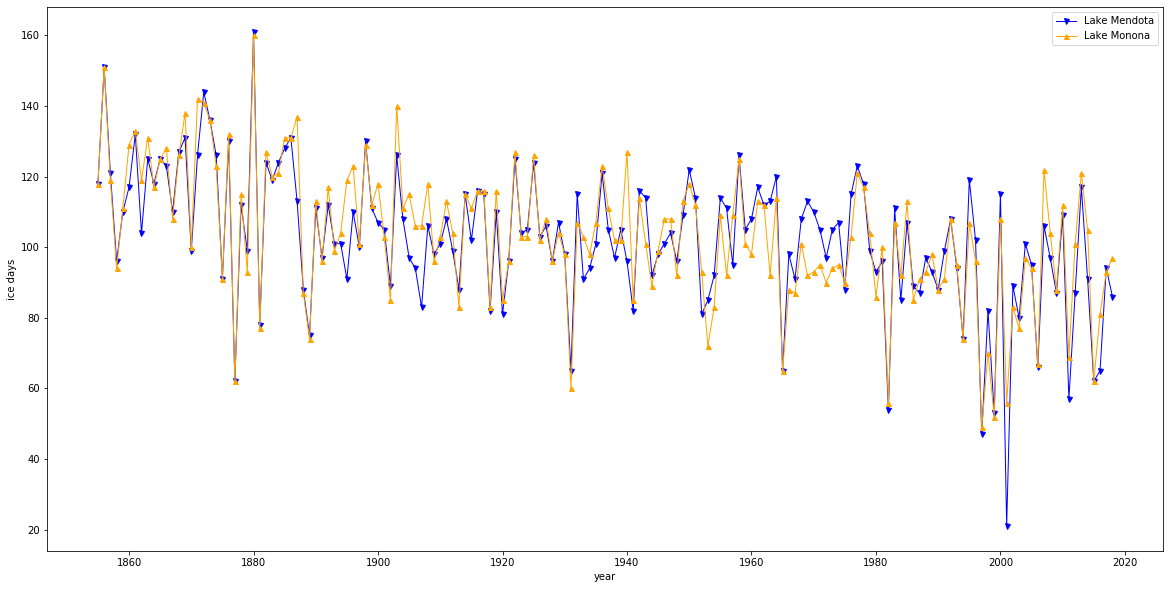

In [7]:
f1 = plt.figure(figsize=(20,10))
# scatter points for Mendota
x_mendota = dic_mendota.keys()
y_mendota = dic_mendota.values()
plt.plot(list(x_mendota), list(y_mendota), "-v", markersize = 5,  linewidth = 1, color = 'blue', label = "Lake Mendota")
# scatter points for Monona
x_monona = dic_monona.keys()
y_monona = dic_monona.values()
plt.plot(list(x_monona), list(y_monona), "-^", markersize = 5, linewidth = 1, color = 'orange', label = "Lake Monona")
plt.legend(loc = 1)
plt.xlabel("year")
plt.ylabel("ice days")
plt.show()

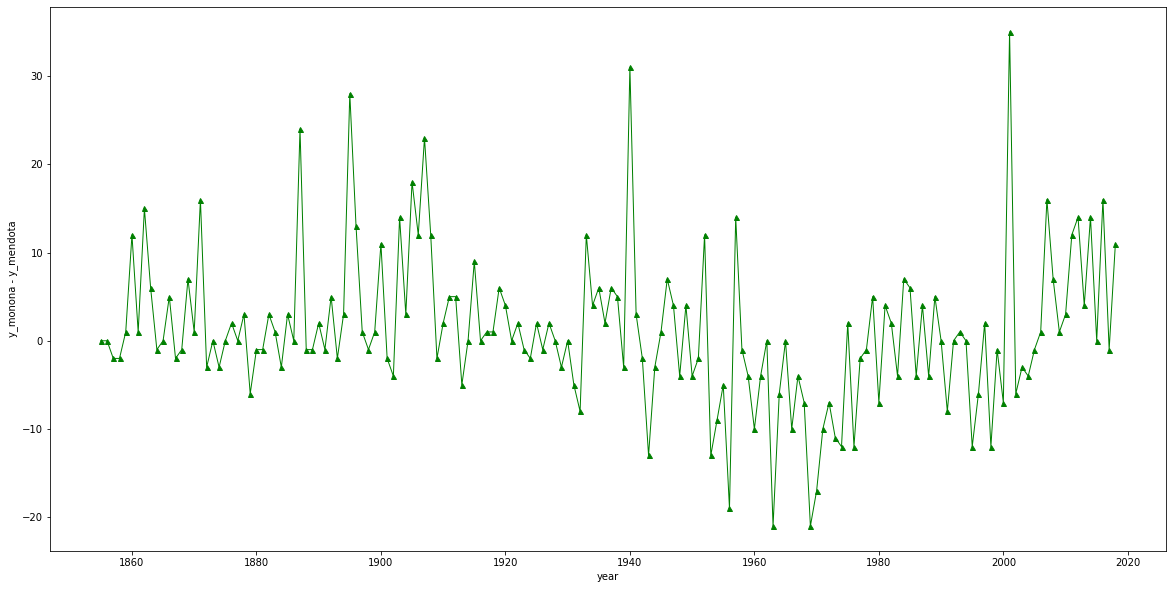

In [8]:
f2 = plt.figure(figsize = (20,10))
x_mendota = dic_mendota.keys()
y_mendota = list(dic_mendota.values())
y_monona = list(dic_monona.values())
y_output = np.zeros(len(x_mendota))
for i in range(len(x_mendota)):
    y_output[i] = y_monona[i] - y_mendota[i]
plt.plot(list(x_mendota), y_output, "-^", markersize = 5, linewidth = 1, color = "green")
plt.xlabel("year")
plt.ylabel("y_monona - y_mendota")
plt.show()

## Question 2:

In [9]:
def get_train_and_test_dic(dic):
    train_dic = dict()
    test_dic = dict()
    for i in dic:
        if i <= 1970:
            train_dic[i] = dic[i]
        else:
            test_dic[i] = dic[i]
    return train_dic, test_dic

def getAverage(dic):
    values = list(dic.values())
    curr_sum = 0
    for i in values:
        curr_sum += i
    average = curr_sum / len(values)
    return average

def getStd(dic):
    average = getAverage(dic)
    curr_sum = 0
    values = list(dic.values())
    for i in values:
        curr_sum += (i - average) ** 2
    result = curr_sum / (len(values) - 1)
    return np.sqrt(result)

In [10]:
train_dic_mendota, test_dic_mendota = get_train_and_test_dic(dic_mendota)
train_dic_monona, test_dic_monona = get_train_and_test_dic(dic_monona)

In [11]:
average_train_dic_mendota = getAverage(train_dic_mendota)
average_train_dic_monona = getAverage(train_dic_monona)
print("average_train_dic_mendota: ", average_train_dic_mendota)
print("average_train_dic_monona: ", average_train_dic_monona)

average_train_dic_mendota:  107.1896551724138
average_train_dic_monona:  108.48275862068965


In [12]:
std_train_dic_mendota = getStd(train_dic_mendota)
std_train_dic_monona = getStd(train_dic_monona)
print("std_train_dic_mendota: ", std_train_dic_mendota)
print("std_train_dic_monona: ", std_train_dic_monona)

std_train_dic_mendota:  16.74666159754441
std_train_dic_monona:  18.122521543826252


## Question 3:

In [13]:
# Construct the Design Matrix
def get_design_matrix(train_dic_mendota, train_dic_monona):
    X = []
    Y = []
    for i in train_dic_mendota:
        x_i = [1, i, train_dic_monona[i]]
        X.append(x_i)
        Y.append(train_dic_mendota[i])
    return X, Y

def calculate_coefficient(X, Y):
    first_part = np.linalg.inv(np.matmul(np.transpose(X), X)) 
    second_part = np.matmul(np.transpose(X), Y)
    return np.matmul(first_part, second_part)


In [14]:
X, Y = get_design_matrix(train_dic_mendota, train_dic_monona)
beta = calculate_coefficient(X, Y)
print(beta)

[-6.41827663e+01  4.12245664e-02  8.52950638e-01]


In [17]:
print(get_loss_value(beta, X, Y))

57.509639136396856


## Question 4:

In [18]:
# Return MSE on X, and Y
def get_loss_value(beta, X, Y):
    norm = np.linalg.norm(np.matmul(X, beta) - Y, 2) 
    return norm ** 2 / len(X)


def get_R_square(beta, dic_mendota, dic_monona):
    average_y = getAverage(dic_mendota)
    average_y_matrix = np.zeros(len(dic_mendota))
    X, Y = get_design_matrix(dic_mendota, dic_monona)
    for i in range(len(average_y_matrix)):
        average_y_matrix[i] = average_y
    SST = np.linalg.norm(Y - average_y_matrix, 2) ** 2
    SSE = np.linalg.norm(np.matmul(X, beta) - average_y_matrix, 2) ** 2
    SSR = get_loss_value(beta, X, Y) * len(X)
    return 1 - SSR / SST

In [19]:
# To calculate the MSE on test set
X_test, Y_test = get_design_matrix(test_dic_mendota, test_dic_monona)
print("loss value: ",get_loss_value(beta, X_test, Y_test))
print("R^2: ", get_R_square(beta, test_dic_mendota, test_dic_monona))

loss value:  124.26409483939055
R^2:  0.710490071562383


## Question 6: 

In [20]:
def get_gradient(X, Y, beta):
    gradient =  np.matmul(X, beta) - Y
    gradient = np.matmul(np.transpose(X), gradient)
    #print("gradient: ", gradient)
    return 2/len(X) * gradient

def update_var(var, gradient, learning_rate):
    return var - learning_rate * gradient

In [21]:
beta = [0,0,0]
learning_rate = 1e-1
print("beta: ", beta)
print("loss_value: ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
    

beta:  [0, 0, 0]
loss_value:  11767.655172413792
1  &  21.43793103448276  &  40964.99310344827  &  2379.0482758620687  &  6180350808297759.0
2  &  -15720688.417764565  &  -30074879522.34012  &  -1703451106.7224255  &  3.3306267815143565e+27
3  &  11540587855812.344  &  2.2078030094932868e+16  &  1250503915942610.2  &  1.794894028506585e+39
4  &  -8.471968901735022e+18  &  -1.6207526576199223e+22  &  -9.179974553646643e+20  &  9.672787691041724e+50
5  &  6.219289517094027e+24  &  1.189797806183348e+28  &  6.739037899087533e+26  &  5.212721209720431e+62
6  &  -4.565593021654541e+30  &  -8.734329775386862e+33  &  -4.947141360789355e+32  &  2.809165597156084e+74
7  &  3.3516110774531574e+36  &  6.411889165431311e+39  &  3.631706485423766e+38  &  1.5138755814390713e+86
8  &  -2.460424475249403e+42  &  -4.70698081329938e+45  &  -2.6660430811228306e+44  &  8.158363032772639e+97
9  &  1.806202586908269e+48  &  3.455404141452923e+51  &  1.9571476216293246e+50  &  4.396589005764996e+109
10  &  -

In [22]:
beta = [0,0,0]
learning_rate = 1e-7
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  2.1437931034482757e-05  &  0.04096499310344827  &  0.002379048275862069  &  1110.1129161163483
2  &  2.715513077533888e-05  &  0.05185502475457021  &  0.0030546406869051603  &  356.5798665121973
3  &  2.8692234240510285e-05  &  0.05474821527306015  &  0.0032772862594323427  &  303.272176071674
4  &  2.911786138375811e-05  &  0.055515070090112376  &  0.0033794915623561357  &  299.47126470347644
5  &  2.924794897171666e-05  &  0.05571653884810825  &  0.0034496690871070436  &  299.17054669283004
6  &  2.929945212342864e-05  &  0.055767673336805046  &  0.003511327448026648  &  299.117301133518
7  &  2.933005854909655e-05  &  0.05577883457201593  &  0.0035707175148007343  &  299.08155674735656
8  &  2.9355107236519346e-05  &  0.05577936721411364  &  0.00362950137499661  &  299.0470542879208
9  &  2.9378676776266748e-05  &  0.05577707391954384  &  0.0036881209728922364  &  299.0126442062925
10  &  2.9401851653335397e-05  &  0.0557740293910486 

In [23]:
beta = [0,0,0]
learning_rate = 1e-6
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  0.00021437931034482758  &  0.4096499310344827  &  0.02379048275862069  &  461425.3207670699
2  &  -0.0011433145086730083  &  -2.188196283163668  &  -0.12276462096465635  &  18541573.033002064
3  &  0.007467553560888404  &  14.284581677099885  &  0.8108437151332372  &  745520179.8162065
4  &  -0.04713253210483675  &  -90.17004475348105  &  -5.104900056550123  &  29976359085.269817
5  &  0.2990899499338722  &  572.179656943501  &  32.41130193333086  &  1205309353426.9465
6  &  -1.896315591633006  &  -3627.800073159465  &  -205.47578055352147  &  48463879387659.984
7  &  12.024819019151845  &  23004.398155432176  &  1302.9776886517266  &  1948667866199789.5
8  &  -76.24951482387621  &  -145871.17638292973  &  -8262.167090898343  &  7.835333243563387e+16
9  &  483.50070707558143  &  924973.9481334805  &  52390.70947524073  &  3.1504828556250286e+18
10  &  -3065.892374537024  &  -5865287.3678424135  &  -332211.0106301894  &  1.266767081252219

In [24]:
beta = [0,0,0]
learning_rate = 1e-8
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  2.143793103448276e-06  &  0.004096499310344827  &  0.00023790482758620688  &  10145.667858626419
2  &  4.130378893960285e-06  &  0.00789224900616639  &  0.000458775096524224  &  8753.080208872163
3  &  5.971298006553971e-06  &  0.011409327207784387  &  0.0006638613158403545  &  7557.447877169021
4  &  7.677243874740856e-06  &  0.014668191274029657  &  0.0008543221943151623  &  6530.915171101077
5  &  9.258124923844816e-06  &  0.017687796782835195  &  0.0010312313795672714  &  5649.566071513553
6  &  1.0723122198690515e-05  &  0.02048570777742597  &  0.0011955837024189855  &  4892.86703848679
7  &  1.2080742760825796e-05  &  0.023078198919302635  &  0.0013483009628611389  &  4243.188622115123
8  &  1.3338869165837849e-05  &  0.0254803501421438  &  0.001490237291268519  &  3685.3947326063235
9  &  1.4504805308524616e-05  &  0.02770613435713672  &  0.001622184116046842  &  3206.4900005402114
10  &  1.558531890255832e-05  &  0.02976849871983

In [25]:
beta = [0,0,0]
learning_rate = 1e-6
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  0.00021437931034482758  &  0.4096499310344827  &  0.02379048275862069  &  461425.3207670699
2  &  -0.0011433145086730083  &  -2.188196283163668  &  -0.12276462096465635  &  18541573.033002064
3  &  0.007467553560888404  &  14.284581677099885  &  0.8108437151332372  &  745520179.8162065
4  &  -0.04713253210483675  &  -90.17004475348105  &  -5.104900056550123  &  29976359085.269817
5  &  0.2990899499338722  &  572.179656943501  &  32.41130193333086  &  1205309353426.9465
6  &  -1.896315591633006  &  -3627.800073159465  &  -205.47578055352147  &  48463879387659.984
7  &  12.024819019151845  &  23004.398155432176  &  1302.9776886517266  &  1948667866199789.5
8  &  -76.24951482387621  &  -145871.17638292973  &  -8262.167090898343  &  7.835333243563387e+16
9  &  483.50070707558143  &  924973.9481334805  &  52390.70947524073  &  3.1504828556250286e+18
10  &  -3065.892374537024  &  -5865287.3678424135  &  -332211.0106301894  &  1.266767081252219

In [26]:
beta = [0,0,0]
learning_rate = 1e-2
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  2.143793103448276  &  4096.499310344827  &  237.9048275862069  &  61801992682736.33
2  &  -157203.02535005938  &  -300741421.5246425  &  -17034082.838534597  &  3.330463452228693e+23
3  &  11540163402.434479  &  22077218083140.258  &  1250457923340.8376  &  1.7947620014807292e+33
4  &  -847155344821240.6  &  -1.6206731781732073e+18  &  -9.179524380515606e+16  &  9.671839034304843e+42
5  &  6.2189082878412095e+19  &  1.1897248741020536e+23  &  6.738624810361575e+21  &  5.212082171804733e+52
6  &  -4.5652571903138915e+24  &  -8.733687304263348e+27  &  -4.9467774638962895e+26  &  2.8087523447496297e+62
7  &  3.351323455671588e+29  &  6.411338922893509e+32  &  3.631394826980905e+31  &  1.513615763161476e+72
8  &  -2.460183169606338e+34  &  -4.706519177088443e+37  &  -2.665781609475721e+36  &  8.156762851568242e+81
9  &  1.8060033022987922e+39  &  3.4550228947035804e+42  &  1.9569316827295062e+41  &  4.395618877393113e+91
10  &  -1.3257744253

In [27]:
beta = [0,0,0]
learning_rate = 1e-3
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  0.2143793103448276  &  409.64993103448273  &  23.79048275862069  &  617868397288.2198
2  &  -1571.644370741974  &  -3006676.845370565  &  -170298.0055163805  &  3.3288304897412035e+19
3  &  11535919.441691762  &  22069099060.20844  &  1249998060.9150717  &  1.793442176273136e+27
4  &  -84673997533.31728  &  -161987854447060.1  &  -9175023559778.639  &  9.662356943520361e+34
5  &  621509702342816.0  &  1.18899574997542e+18  &  6.734495037137094e+16  &  5.205695669430804e+42
6  &  -4.561900008963962e+18  &  -8.727264758739253e+21  &  -4.943139721628609e+20  &  2.8046228845751294e+50
7  &  3.348448401261865e+22  &  6.405838723200372e+25  &  3.628279503184544e+24  &  1.5110198567452154e+58
8  &  -2.4577712518647437e+26  &  -4.701904993378621e+29  &  -2.663168126854369e+28  &  8.140777214774131e+65
9  &  1.804011530897824e+30  &  3.4512124831818513e+33  &  1.954773458237698e+32  &  4.385928706677502e+73
10  &  -1.3241499188108372e+34  &  -2.5

In [28]:
beta = [0,0,0]
learning_rate = 1e-4
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  0.02143793103448276  &  40.96499310344827  &  2.379048275862069  &  6163541503.948575
2  &  -15.677855431557674  &  -29993.03146611944  &  -1698.6977682672534  &  3312533871817738.0
3  &  11493.537137854139  &  21988018.330316674  &  1245405.795853439  &  1.78028834861592e+21
4  &  -8425946.762745045  &  -16119482693.130024  &  -913010632.5043329  &  9.567982477651222e+26
5  &  6177087050.983098  &  11817241505903.053  &  669330855689.1824  &  5.142216920299071e+32
6  &  -4528441195905.346  &  -8663255482012027.0  &  -490688474288211.7  &  2.763633286032234e+38
7  &  3319813934224766.0  &  6.351058790591787e+18  &  3.5972520428849734e+17  &  1.485287193839562e+44
8  &  -2.4337656339312415e+18  &  -4.6559804042839154e+21  &  -2.63715635033227e+20  &  7.982528142693928e+49
9  &  1.7842009456737557e+21  &  3.4133133135515917e+24  &  1.933307294898436e+23  &  4.290130273336457e+55
10  &  -1.308003108500241e+24  &  -2.5023103116475455e+27  & 

In [29]:
beta = [0,0,0]
learning_rate = 1e-5
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  0.002143793103448276  &  4.096499310344828  &  0.2379048275862069  &  60131653.12688203
2  &  -0.15291972672936985  &  -292.55661590257375  &  -16.55874899301736  &  315283852895.1312
3  &  11.075444458443462  &  21188.160974055587  &  1200.1190648412576  &  1653112656695485.5
4  &  -801.9736350515137  &  -1534237.1192611272  &  -86899.46536642147  &  8.667686065008162e+18
5  &  58071.15623446466  &  111094577.74216975  &  6292418.504590769  &  4.544686136015049e+22
6  &  -4204949.980038337  &  -8044391964.108703  &  -455635924.3174436  &  2.382893418148727e+26
7  &  304481699.5881958  &  582496854660.441  &  32992735061.875473  &  1.2494110423289576e+30
8  &  -22047611939.084602  &  -42178773386580.836  &  -2389013922466.2954  &  6.550976811654033e+33
9  &  1596474247463.7212  &  3054177735318040.5  &  172989220537240.5  &  3.434842156255704e+37
10  &  -115601183015046.72  &  -2.2115393336402995e+17  &  -1.25262017691333e+16  &  1.80097

##  Question 7:
Normalize the data of year and $x_{Monona}$

In [30]:
def get_average_of_set(s):
    curr_sum = 0
    for i in list(s):
        curr_sum += i
    return curr_sum / len(s)

def get_std_of_set(s):
    average = get_average_of_set(s)
    curr_sum = 0
    for i in s:
        curr_sum += (i - average) ** 2
    result = curr_sum / (len(s) - 1)
    return np.sqrt(result)

def normalize_set(s, average, std):
    result = np.zeros(len(s))
    for i in range(len(s)):
        result[i] = (s[i] - average) / std
    return result

def normalize_matrix(X):
    X = np.transpose(X)
    X = np.array(X, dtype = np.float64)
    for i in range(1, len(X)):
        average = get_average_of_set(X[i])
        std = get_std_of_set(X[i])
        X[i] = normalize_set(X[i], average, std)
    return np.transpose(X)


In [31]:
normalized_X = normalize_matrix(X)
print(normalized_X)

[[ 1.         -1.70976547  0.52516099]
 [ 1.         -1.68003042  2.34609965]
 [ 1.         -1.65029537  0.58034095]
 [ 1.         -1.62056032 -0.79915803]
 [ 1.         -1.59082526  0.13890128]
 [ 1.         -1.56109021  1.13214054]
 [ 1.         -1.53135516  1.35286038]
 [ 1.         -1.50162011  0.58034095]
 [ 1.         -1.47188506  1.24250046]
 [ 1.         -1.44215001  0.46998103]
 [ 1.         -1.41241495  0.91142071]
 [ 1.         -1.3826799   1.07696058]
 [ 1.         -1.35294485 -0.0266386 ]
 [ 1.         -1.3232098   0.96660067]
 [ 1.         -1.29347475  1.62876018]
 [ 1.         -1.2637397  -0.46807827]
 [ 1.         -1.23400464  1.84948001]
 [ 1.         -1.20426959  1.79430005]
 [ 1.         -1.17453454  1.51840026]
 [ 1.         -1.14479949  0.80106079]
 [ 1.         -1.11506444 -0.96469791]
 [ 1.         -1.08532939  1.29768042]
 [ 1.         -1.05559433 -2.56491673]
 [ 1.         -1.02585928  0.35962111]
 [ 1.         -0.99612423 -0.85433799]
 [ 1.         -0.96638918

In [32]:
beta = [0,0,0]
learning_rate = 1e-1
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, normalized_X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(normalized_X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  21.43793103448276  &  -1.0422135611212198  &  2.9467410477145592  &  7545.998373501811
2  &  38.588275862068976  &  -1.6266973410198067  &  5.220410220655868  &  4850.273518530399
3  &  52.30855172413794  &  -1.9015587758996588  &  6.993463365634234  &  3127.473895121937
4  &  63.28477241379311  &  -1.970844667076492  &  8.391542655956412  &  2025.6079196795692
5  &  72.06574896551724  &  -1.907266210297299  &  9.506512902731407  &  1320.3620154290259
6  &  79.09053020689655  &  -1.7612901693919225  &  10.405828814316633  &  868.6443341670564
7  &  84.7103552  &  -1.5676293302993598  &  11.139270319528144  &  579.0974806545676
8  &  89.20621519448275  &  -1.3498721557003726  &  11.74378940446234  &  393.3511885316241
9  &  92.80290319006896  &  -1.1237815047765827  &  12.24700145797667  &  274.08708818677417
10  &  95.68025358653793  &  -0.8996418081774248  &  12.669703292474024  &  197.43183896910952


In [33]:
beta = [0,0,0]
learning_rate = 1e-1
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, normalized_X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(normalized_X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  21.43793103448276  &  -1.0422135611212198  &  2.9467410477145592  &  7545.998373501811
2  &  38.588275862068976  &  -1.6266973410198067  &  5.220410220655868  &  4850.273518530399
3  &  52.30855172413794  &  -1.9015587758996588  &  6.993463365634234  &  3127.473895121937
4  &  63.28477241379311  &  -1.970844667076492  &  8.391542655956412  &  2025.6079196795692
5  &  72.06574896551724  &  -1.907266210297299  &  9.506512902731407  &  1320.3620154290259
6  &  79.09053020689655  &  -1.7612901693919225  &  10.405828814316633  &  868.6443341670564
7  &  84.7103552  &  -1.5676293302993598  &  11.139270319528144  &  579.0974806545676
8  &  89.20621519448275  &  -1.3498721557003726  &  11.74378940446234  &  393.3511885316241
9  &  92.80290319006896  &  -1.1237815047765827  &  12.24700145797667  &  274.08708818677417
10  &  95.68025358653793  &  -0.8996418081774248  &  12.669703292474024  &  197.43183896910952


In [34]:
beta = [0,0,0]
learning_rate = 1e-2
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, normalized_X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(normalized_X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  2.143793103448276  &  -0.10422135611212198  &  0.29467410477145595  &  11303.019663371015
2  &  4.244710344827585  &  -0.2038654144120171  &  0.5826174907951793  &  10856.880645469235
3  &  6.303609241379309  &  -0.29908028233589046  &  0.8640026139179805  &  10428.499209186446
4  &  8.321330159999999  &  -0.3900096612564558  &  1.1389972486193198  &  10017.166089426179
5  &  10.298696660248275  &  -0.47679297373323376  &  1.4077646183744192  &  9622.200469635936
6  &  12.236515830491586  &  -0.5595654871289852  &  1.6704635223483257  &  9242.948834521754
7  &  14.13557861733003  &  -0.6384584336956088  &  1.9272484585246303  &  8878.783869365008
8  &  15.996660148431705  &  -0.7135991272298753  &  2.178269743369625  &  8529.103404030397
9  &  17.820520048911348  &  -0.7851110763965352  &  2.4236736281298135  &  8193.329399833321
10  &  19.607902751381395  &  -0.8531140948135592  &  2.6636024118579273  &  7870.906977510949


In [35]:
beta = [0,0,0]
learning_rate = 1e-0
#print("beta: ", beta)
#print("loss_value: ", get_loss_value(beta, normalized_X, Y))
print(0, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))
for i in range(1,11):
    beta = update_var(beta, get_gradient(normalized_X, Y, beta), learning_rate)
    #print("beta: ", beta)
    #print("loss_value: ", get_loss_value(beta, X, Y))
    print(i, " & ", beta[0], " & " , beta[1] ," & ", beta[2], " & ", get_loss_value(beta, normalized_X, Y))

0  &  0  &  0  &  0  &  11767.655172413792
1  &  214.3793103448276  &  -10.422135611212198  &  29.46741047714559  &  12020.91633487461
2  &  -5.684341886080802e-14  &  24.928706899838758  &  -8.372366523033854  &  13137.591111272877
3  &  214.37931034482756  &  -42.054908670744325  &  58.93651580976627  &  16901.507763962
4  &  0.0  &  81.12593035494596  &  -64.28683074959588  &  29573.219800978753
5  &  214.3793103448276  &  -144.92644640862522  &  161.77110111713625  &  72233.91869340594
6  &  0.0  &  269.8464435131663  &  -253.0025147741125  &  215855.80410604266
7  &  214.37931034482787  &  -491.1927866010038  &  508.03681021348126  &  699374.5110612202
8  &  -6.536993168992922e-13  &  905.1865009863  &  -888.3424897723698  &  2327192.8571560695
9  &  214.37931034482938  &  -1656.9350465037073  &  1673.7790593379427  &  7807420.467312624
10  &  -3.609557097661309e-12  &  3044.1278074972493  &  -3027.283794874765  &  26257203.10501998


## Question 8:

In [36]:
def get_update_design_matrix(train_dic_mendota):
    X = []
    Y = []
    for i in train_dic_mendota:
        x_i = [1, i]
        X.append(x_i)
        Y.append(train_dic_mendota[i])
    return np.array(X), np.array(Y)

In [45]:
X_update, Y_update = get_update_design_matrix(train_dic_mendota)
beta = calculate_coefficient(X_update, Y_update)
print(beta)

[ 4.06111060e+02 -1.56298774e-01]


## Question 9:

In [41]:
def get_merged_point_set(train_dic_mendota, train_dic_monona):
    points = []
    for i in train_dic_mendota:
        x_i = [1, i, train_dic_monona[i], train_dic_mendota[i]]
        points.append(x_i)
    return points

In [44]:
points = get_merged_point_set(train_dic_mendota, train_dic_monona)
with open('Q9.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(points)
csvFile.close()

## Question 10:
Rigid regression with $\lambda = 1$:

In [63]:
def calculate_rigid_regression_coefficient(lambda_, X, Y, A):
    n = len(X)
    part1 = 1/n * np.matmul(np.transpose(X), X) + lambda_ * A
    part1 = np.linalg.inv(part1)
    part2 = np.matmul(np.transpose(X), Y)
    beta = 1/n * np.matmul(part1, part2)
    return beta

In [66]:
X, Y = get_design_matrix(train_dic_mendota, train_dic_monona)
A = [[0,0,0],[0,1,0],[0,0,1]]
lambda_ = 1
print( calculate_rigid_regression_coefficient(lambda_, X, Y, A))

[-6.23294723e+01  4.04390872e-02  8.49714502e-01]
